In [1]:
#import the libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import read_csv
from pandas import set_option

#### Load the data

In [2]:
# Load CSV using Pandas
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
print(data.shape)

(768, 9)


#### Desrciptive Stats

In [3]:

filename = "diabetes"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

In [4]:
# Data Types for Each Attribute
types = data.dtypes
print(types)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [6]:
# Statistical Summary

description = data.describe()
print(description)

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [7]:
# Pairwise Pearson correlations
correlations = data.corr(method='pearson')
print(correlations)

           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

In [8]:
# Class proportion
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


#### Data Visualization

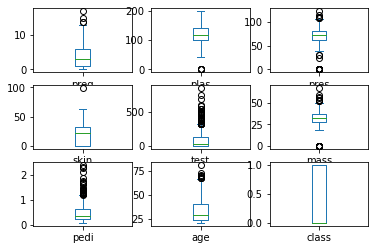

In [9]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

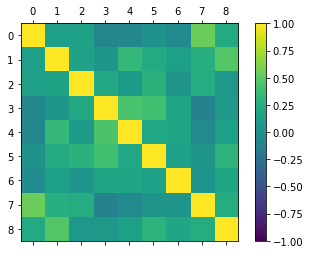

In [10]:
# Correction Matrix Plot (generic)
from matplotlib import pyplot
from pandas import read_csv
import numpy

correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111) #"111" means "1x1 grid, first subplot" 
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()


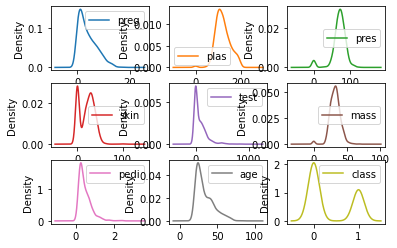

In [11]:
# Univariate Density Plots
from matplotlib import pyplot
from pandas import read_csv

data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

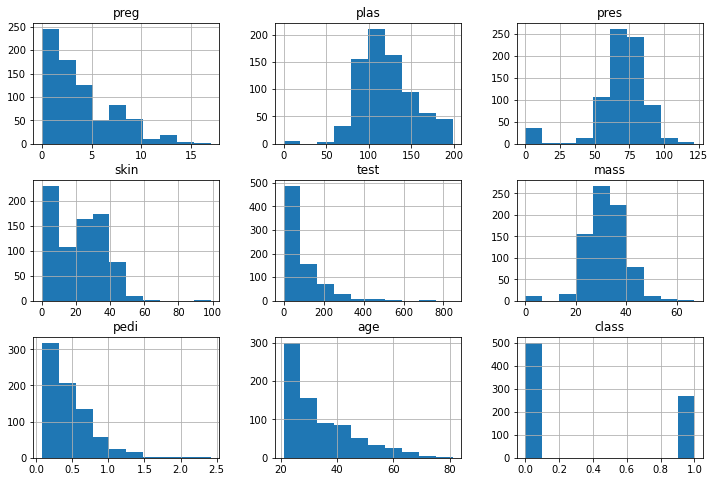

In [12]:
# Univariate Histograms
from matplotlib import pyplot
from pandas import read_csv

data.hist(figsize=(12, 8))
pyplot.show()

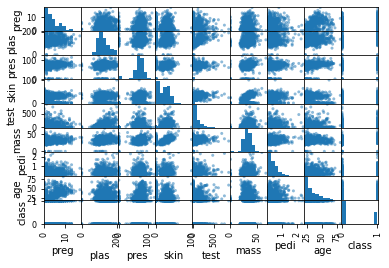

In [13]:
# Scatterplot Matrix
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix

scatter_matrix(data)
pyplot.show()

#### Data Rescaling

In [14]:
# Rescale data (between x and y)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)



array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.35 0.74 0.59 0.35 0.   0.5  0.23 0.48]
 [0.06 0.43 0.54 0.29 0.   0.4  0.12 0.17]
 [0.47 0.92 0.52 0.   0.   0.35 0.25 0.18]
 [0.06 0.45 0.54 0.23 0.11 0.42 0.04 0.  ]
 [0.   0.69 0.33 0.35 0.2  0.64 0.94 0.2 ]]


#### Data Standardization

In [15]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


#### Feature Engineering- Method1

In [16]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)


array = data.values
X = array[:,0:8]
Y = array[:,8]


# feature extraction
model = LogisticRegression(max_iter=500)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_

array([1, 1, 3, 5, 4, 1, 1, 2])

#### Feature Engineering- Method2

In [17]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data= read_csv(filename, names=names)

array = data.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.108 0.242 0.099 0.079 0.076 0.138 0.117 0.14 ]


#### Model Validation Methods

In [18]:
# Evaluate using a train test split method
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = data.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.33
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)


result = model.score(X_test, Y_test)

result*100.0


78.74015748031496

In [19]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = data.values
X = array[:,0:8]
Y = array[:,8]

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100.0
results.std()*100.0


5.157545262086822

#### Accuracy Methods

In [20]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = data.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


results.mean()
results.std()

0.051575452620868226

In [21]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score #The F1 score can be interpreted as a weighted average of the precision and recall
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = data.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

#F1 score
matrix = f1_score(Y_test, predicted)
matrix

0.6823529411764706

#### Model Building

In [22]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)

array = data.values
X = array[:,0:8]
Y = array[:,8]

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)

0.6913192071086808


In [23]:
# Gaussian Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


In [24]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())


0.7565276828434724


In [25]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7604237867395763


In [26]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7525974025974026


In [35]:
# Bagged Decision Trees for Classification

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7708133971291866


In [28]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7681476418318524


In [29]:
# Voting Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7695146958304854


#### Compare the algorithms

In [30]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.776042 (0.051575)
KNN: 0.726555 (0.061821)
CART: 0.697830 (0.067881)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


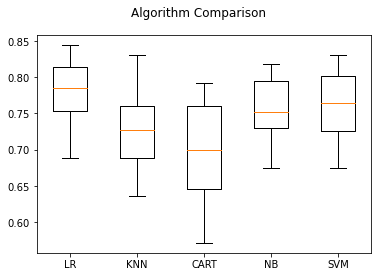

In [31]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### ML Pipelines

In [32]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# load data
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7799555707450445


In [33]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7760423786739576


In [34]:
# Save Model Using Pickle and load and predict
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
filename = 'diabetes'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open('filename', 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open('filename', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497
